# Introduction
Perkenalkan nama saya Pascalis Farrel, student Hacktiv8 batch 008 Data Science. Pada Milestone ini, saya akan mengolah dan memuat dataset untuk melakukan hypothesis testing, membuat dashboard interaktif terhadap dataset yang diberikan, dan mempresentasikan hasil visualisasi data dan temuan.

## Import Pustaka & Data Loading

Dimulai dengan semua mengimport semua library yang akan digunakan dan dataset yang diberikan akan di-load.

In [1]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

df=pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Data Cleaning

Setelah dataset di-load, maka akan dilakukan proses cleaning data.

In [3]:
df.isnull().sum() #tidak ada data yang bernilai NaN

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Diketahui bahwa tidak ada missing value.

Berikut akan dilakukan proses grouping data berdasarkan kolom 'Product Line' dan 'Gross Income'.

In [4]:
product_inc = df.groupby('Product line')['gross income'].mean()
product_inc.head()

Product line
Electronic accessories    15.220597
Fashion accessories       14.528062
Food and beverages        15.365310
Health and beauty         15.411572
Home and lifestyle        16.030331
Name: gross income, dtype: float64

Berikut akan dilakukan proses grouping data berdasarkan kolom 'Customer type' dan 'Quantity'.

In [5]:
cust_q = df.groupby('Customer type')['Quantity'].mean()
cust_q.head()

Customer type
Member    5.558882
Normal    5.460922
Name: Quantity, dtype: float64

Berikut akan dilakukan proses grouping data berdasarkan kolom 'Customer type' dan 'Rating'.

In [6]:
cust_r = df.groupby('Customer type')['Rating'].mean()
cust_r.head()

Customer type
Member    6.940319
Normal    7.005210
Name: Rating, dtype: float64

Berikut akan dilakukan proses grouping data berdasarkan kolom 'City' dan 'gross income'.

In [7]:
city_inc = df.groupby('City')['gross income'].mean()
city_inc.head()

City
Mandalay     15.232024
Naypyitaw    16.052367
Yangon       14.874001
Name: gross income, dtype: float64

Berikut merupakan visualisasi data untuk mengetahui rata-rata gross income per product line.

Text(0, 0.5, 'gross income')

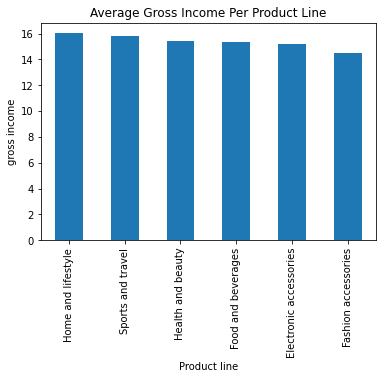

In [8]:
fig1,ax1 = plt.subplots()

df.groupby('Product line').mean()['gross income'].sort_values(ascending=False).plot(kind='bar',ax=ax1)

ax1.set_title('Average Gross Income Per Product Line') 
ax1.set_xlabel('Product line') 
ax1.set_ylabel('gross income') 

Berikut merupakan visualisasi data untuk mengetahui rata-rata penjualan berdasarkan tipe pelanggan.

Text(0, 0.5, 'Quantity')

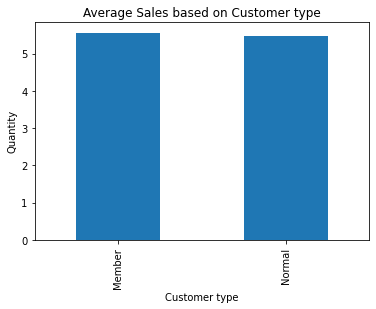

In [9]:
fig2,ax2 = plt.subplots()

df.groupby('Customer type').mean()['Quantity'].sort_values(ascending=False).plot(kind='bar',ax=ax2)

ax2.set_title('Average Sales based on Customer type') 
ax2.set_xlabel('Customer type') 
ax2.set_ylabel('Quantity') 

Berikut merupakan visualisasi data untuk mengetahui rata-rata rating berdasarkan tipe pelaanggan.

Text(0, 0.5, 'Rating')

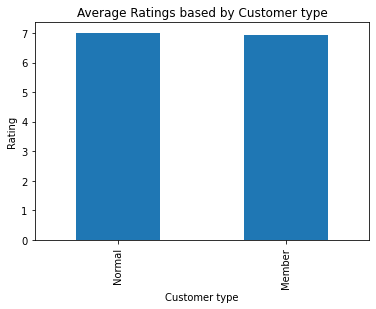

In [10]:
fig3,ax3 = plt.subplots()

df.groupby('Customer type').mean()['Rating'].sort_values(ascending=False).plot(kind='bar',ax=ax3)

ax3.set_title('Average Ratings based by Customer type') 
ax3.set_xlabel('Customer type') 
ax3.set_ylabel('Rating') 

Berikut merupakan visualisasi data untuk mengetahui rata-rata gross income per kota.

Text(17.200000000000003, 0.5, 'gross income')

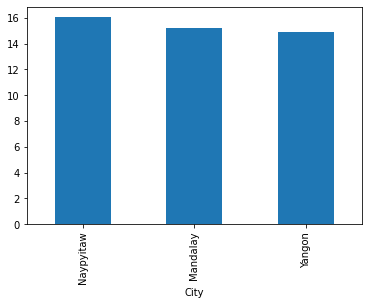

In [11]:
fig4,ax4 = plt.subplots()

df.groupby('City').mean()['gross income'].sort_values(ascending=False).plot(kind='bar',ax=ax4)

ax1.set_title('Average Gross Income Per City') 
ax1.set_xlabel('City') 
ax1.set_ylabel('gross income') 

Berikut akan dihitung mean, median, modus, range, standard deviation, dan variance dari kolom kuantitas.

In [12]:
print ('Mean :', df['Quantity'].mean())
print ('Median :', df['Quantity'].median())
print ('Mode :', df['Quantity'].mode())
print ('Range :',(df['Quantity'].max() - df['Quantity'].min()))
print ('Standar deviasi :', df['Quantity'].std())
print ('Variance:', df['Quantity'].var())

Mean : 5.51
Median : 5.0
Mode : 0    10
dtype: int64
Range : 9
Standar deviasi : 2.923430595455696
Variance: 8.546446446446446


Berikut akan dihitung P-value dan t-stat dari sales dari product line Fashion accessories dan Food and Beverages.

In [13]:
fashion = df[df['Product line'] == 'Fashion accessories']
food = df[df['Product line'] == 'Food and beverages']

t_stat, p_val = stats.ttest_ind(fashion['Quantity'], food['Quantity'])
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.20612360348103295
t-statistics: -1.2666475878728471


Berikut merupakan implementasi dari Hypothesis Testing T-Test 2 Sample 2 Tailed

-1.01243806912397


E:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


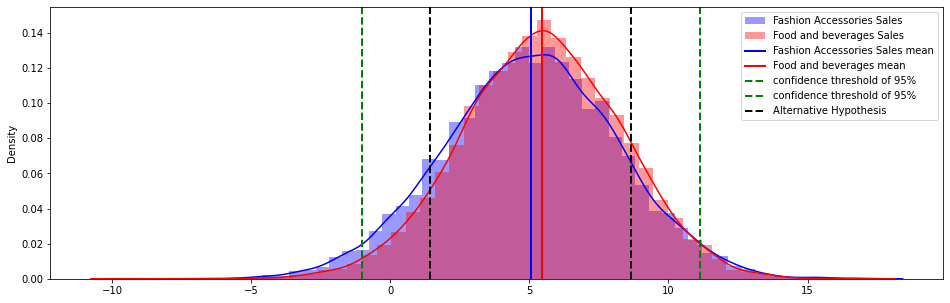

In [14]:
fashion_pop = np.random.normal(fashion['Quantity'].mean(),fashion['Quantity'].std(),10000)
food_pop = np.random.normal(food['Quantity'].mean(),food['Quantity'].std(),10000)


ci = stats.norm.interval(0.95, fashion['Quantity'].mean(), fashion['Quantity'].std())

plt.figure(figsize=(16,5))
sns.distplot(fashion_pop, label='Fashion Accessories Sales',color='blue')
sns.distplot(food_pop, label='Food and beverages Sales',color='red')

plt.axvline(fashion['Quantity'].mean(), color='blue', linewidth=2, label='Fashion Accessories Sales mean')
plt.axvline(food['Quantity'].mean(), color='red',  linewidth=2, label='Food and beverages mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(fashion_pop.mean()+t_stat*food_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(fashion_pop.mean()-t_stat*food_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(ci[0])

Dikarenakan confidence interval pada T-Test 2 Sample 2 Tailed adalah 0.95, maka diperoleh nilai p value sebesar 0.20612360348103295 dimana nilai tersebut diatas nilai alpha. Dapat disimpulkan bahwa H0 yang diterima, bahwa nilai Average pada Fashion Accessories Sales yaitu sama dengan Average dari Food and beverages Sales

# Kesimpulan

Dari hasil MileStone ini, saya dapat mengetahui bahwa data yang diberikan memiliki kolom yang berbeda-beda, sehingga saya dapat membuat visualisasi data yang diberikan. 

Kesimpulan dari hypothesis testing adalah bahwa H0 yang diterima, bahwa nilai Average pada Fashion Accessories Sales yaitu sama dengan Average dari Food and beverages Sales.